In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import metrics


#### Problem1:<br>
About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not<br><br>
The company dataset looks like this: <br>
Problem Statement:<br>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. <br>
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


 > Here we need to converting our Decision Tree Regression Problem to Decision Tree Classification Problem.


In [2]:
#Importing data

company_df=pd.read_csv('Company_Data.csv')
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Exploratory Data Analysis (EDA)

In [3]:
#Checking for null value

company_df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_df.shape

(400, 11)

In [5]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company_df['Sales'].min()

0.0

In [7]:
company_df['Sales'].max()

16.27

In [8]:
company_df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
label_encoder=preprocessing.LabelEncoder()
company_df['ShelveLoc']=label_encoder.fit_transform(company_df['ShelveLoc'])
label_encoder.inverse_transform([0,1,2])

array(['Bad', 'Good', 'Medium'], dtype=object)

In [10]:
label_encoder=preprocessing.LabelEncoder()
company_df['Urban']=label_encoder.fit_transform(company_df['Urban'])
label_encoder.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [11]:
label_encoder=preprocessing.LabelEncoder()
company_df['US']=label_encoder.fit_transform(company_df['US'])
label_encoder.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

## Preprocessing<br>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. <br>
 Convertig target varible 'Sales' in categorical variable <br>
* we will use mean for dividing 'sales' column respect to high sale or low sales

In [12]:
company_df['Sales'].mean()

7.496325000000001

In [13]:
sales=[]
for i in company_df['Sales']:
  if i >= company_df['Sales'].mean():
    sales.append('High')
  else:
     sales.append('Low')

#sales

In [14]:
company_df['Sales_cat']=sales

In [15]:
company_df=company_df.drop('Sales',axis=1)
company_df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Low
397,162,26,12,368,159,2,40,18,1,1,Low
398,100,79,7,284,95,0,50,12,1,1,Low


In [16]:
#Creating x variable ie.,Independent variable---all columns except 'Sales'
#     and y variable ie., Dependent variable---'Sales_cat' column is our target variable


x=company_df.iloc[:,:10]
y=company_df.iloc[:,10]
#print(x)
#print(y)

In [17]:
company_df['Sales_cat'].unique()

array(['High', 'Low'], dtype=object)

In [18]:
company_df['Sales_cat'].value_counts()

Sales_cat
Low     201
High    199
Name: count, dtype: int64

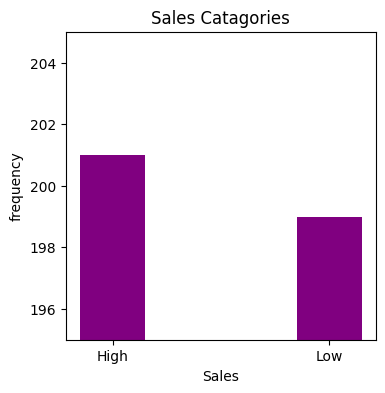

In [19]:
plt.figure(figsize=(4,4))
plt.bar(company_df['Sales_cat'].unique(),company_df['Sales_cat'].value_counts()\
        ,color ='purple',width = 0.3)
plt.ylim(195,205)
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('Sales Catagories')
plt.show()

In [20]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=15)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(320, 10)
(320,)
(80, 10)
(80, 10)


In [22]:
company_df.sample(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
396,139,23,3,37,120,2,55,11,0,1,Low
173,135,91,5,207,128,2,66,18,1,1,Low
341,98,120,0,268,93,2,72,10,0,0,Low
395,138,108,17,203,128,1,33,14,1,1,High
188,116,37,0,426,90,2,76,15,1,0,High
23,121,31,0,292,109,2,79,10,1,0,Low
144,132,68,0,264,123,1,34,11,0,0,High
241,136,63,0,160,94,2,38,12,1,0,High
218,138,61,12,156,120,2,25,14,1,1,High
286,117,118,11,429,113,2,67,18,0,1,High


In [23]:
x_train.shape

(320, 10)

## Modeling



### Building Decision Tree Classifier using 'gini' Criteria

In [ ]:
#gini= 1-p1^2 -p2^2 -p3^2  # 1-(1/n)

In [24]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [25]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [26]:
y.unique()

array(['High', 'Low'], dtype=object)

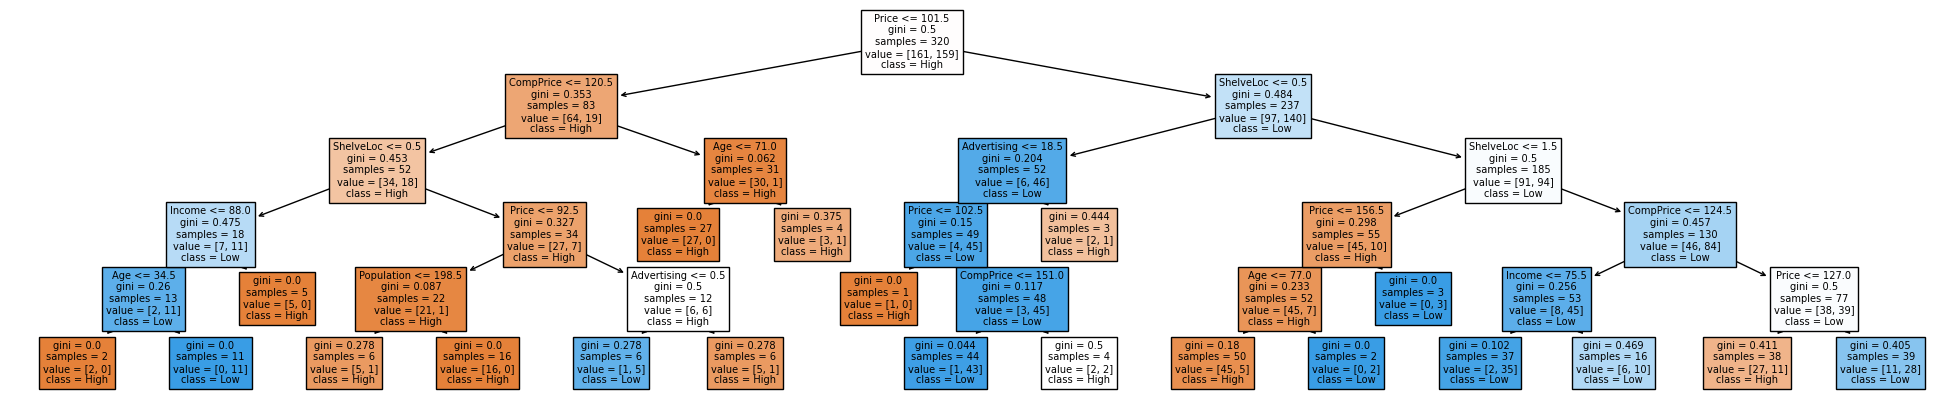

In [27]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['High', 'Low']

plt.subplots(figsize=(25,5),dpi=100)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## Evaluation

In [28]:
#Predicting on testing data

preds=model.predict(x_test) #Predicting on test dataset
pd.Series(preds).value_counts() #getting the count of each catagories

High    41
Low     39
Name: count, dtype: int64

In [29]:
#Accuracy of training data

model.score(x_train,y_train)

0.865625

In [30]:
#Accuracy of testing data

model.score(x_test,y_test)

0.7875

Comment:<br>
Accuracy of training data is somehow equal to Accuracy of testing data.Therefore, no problem of overfitting and underfitting

In [31]:
metrics.accuracy_score(preds,y_test)

0.7875

In [32]:
#Classification Report

print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.76      0.82      0.78        38
         Low       0.82      0.76      0.79        42

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



Comments:<br>
Data is balanced ,therefore we can look for Accuracy ie.,80%

In [33]:
model.feature_importances_

array([0.13332681, 0.0774342 , 0.04768899, 0.00251228, 0.33513631,
       0.33202786, 0.07187355, 0.        , 0.        , 0.        ])

### Building Decision Tree Classifier using 'entropy' Criteria

In [34]:
#entropy: -p1log2(p1) -p2log2(p2) -p3log2(p3)  # log2(n)

In [35]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=5)

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [37]:
#Prediction
preds=model.predict(x_test)

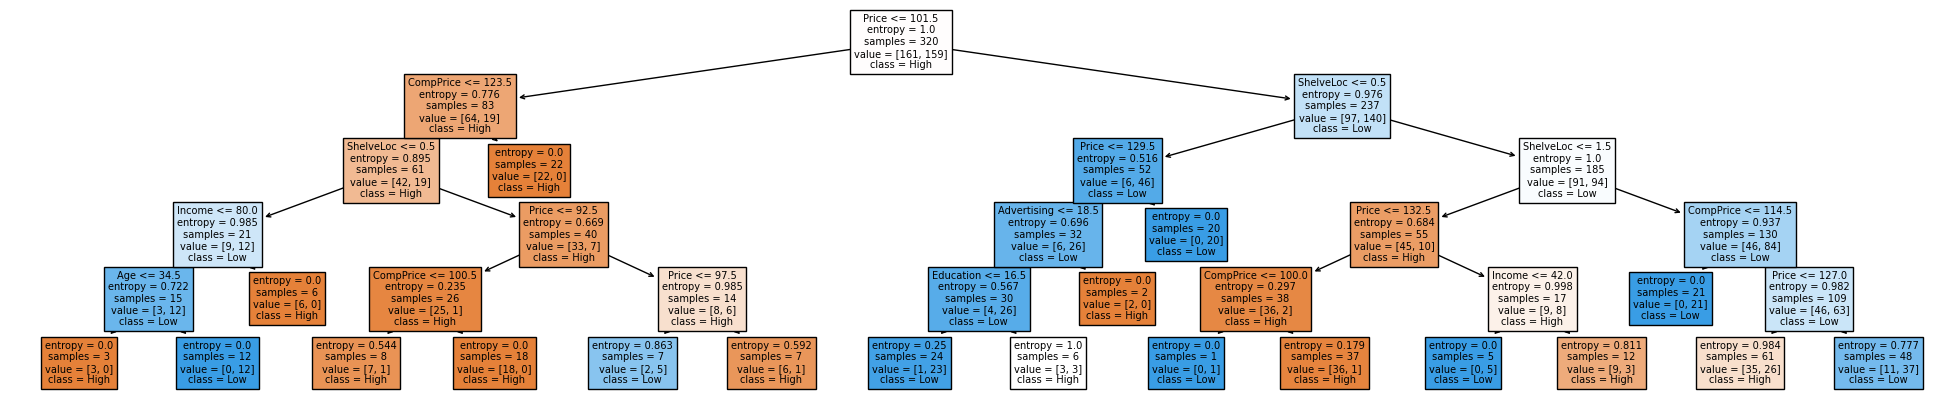

In [38]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['High', 'Low']

plt.subplots(figsize=(25,5),dpi=100)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## Evaluation

In [39]:
#Accuracy of training data

model.score(x_train,y_train)

0.846875

In [40]:
#Accuracy of testing data

metrics.accuracy_score(y_test,preds)

0.775

In [41]:
#Classification Report

print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.73      0.84      0.78        38
         Low       0.83      0.71      0.77        42

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



Comments:<br>
Data is balanced ,therefore we can look for Accuracy ie.,74%

Another Method:<br>
Converting continuous values in a column of a DataFrame to categorical values can be done using a process called binning or discretization. Binning involves dividing the range of continuous values into a set of discrete bins or categories.

In [42]:
#Importing data

company_df=pd.read_csv('Company_Data.csv')
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [43]:
#defining bins edges (boundaries)
bin_edges=[-1,5,10,15,20]

#defining labels for the bins
bin_labels=['D','C','B','A']

#Using the cut function to convert continuous values to catagorical values
company_df['Sales']=pd.cut(company_df['Sales'],bins=bin_edges,labels=bin_labels)

In [44]:
#'A','B' -> should be consider as high sale
#'C','D' ->should be consider as low sale

In [45]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,C,138,73,11,276,120,Bad,42,17,Yes,Yes
1,B,111,48,16,260,83,Good,65,10,Yes,Yes
2,B,113,35,10,269,80,Medium,59,12,Yes,Yes
3,C,117,100,4,466,97,Medium,55,14,Yes,Yes
4,D,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,B,138,108,17,203,128,Good,33,14,Yes,Yes
396,C,139,23,3,37,120,Medium,55,11,No,Yes
397,C,162,26,12,368,159,Medium,40,18,Yes,Yes
398,C,100,79,7,284,95,Bad,50,12,Yes,Yes


In [46]:
company_df['Sales'].value_counts()

Sales
C    245
D     77
B     76
A      2
Name: count, dtype: int64

In [47]:
company_df['Sales'].value_counts().sum()

400

In [48]:
company_df['Sales'].isna().value_counts()

Sales
False    400
Name: count, dtype: int64

In [49]:
null_indices=company_df['Sales'][company_df['Sales'].isna()].index
print(null_indices)

Index([], dtype='int64')


In [50]:
label_encoder=preprocessing.LabelEncoder()
company_df['ShelveLoc']=label_encoder.fit_transform(company_df['ShelveLoc'])
label_encoder.inverse_transform([0,1,2])

array(['Bad', 'Good', 'Medium'], dtype=object)

In [51]:
label_encoder=preprocessing.LabelEncoder()
company_df['Urban']=label_encoder.fit_transform(company_df['Urban'])
label_encoder.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [52]:
label_encoder=preprocessing.LabelEncoder()
company_df['US']=label_encoder.fit_transform(company_df['US'])
label_encoder.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [53]:
company_df.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
86,C,150,84,9,432,134,2,64,15,1,0
269,C,159,69,0,438,166,2,46,17,1,0
168,C,129,89,0,425,117,2,45,10,1,0
106,D,102,33,0,217,139,2,70,18,0,0
6,C,115,105,0,45,108,2,71,15,1,0
35,B,131,84,11,29,96,2,44,17,0,1
290,C,107,111,14,400,103,2,41,11,0,1
14,B,107,117,11,148,118,1,52,18,1,1
163,C,130,64,0,40,106,0,39,17,0,0
314,C,133,33,10,333,129,1,71,14,1,1


In [54]:
x=company_df.iloc[:,1:]
y=company_df.iloc[:,0]
#print(x)
#print(y)

In [55]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320,)
(80,)


## Modeling

Building Decision Tree Classifier using 'gini'
Criteria

In [57]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [58]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [59]:
y.unique()

['C', 'B', 'D', 'A']
Categories (4, object): ['D' < 'C' < 'B' < 'A']

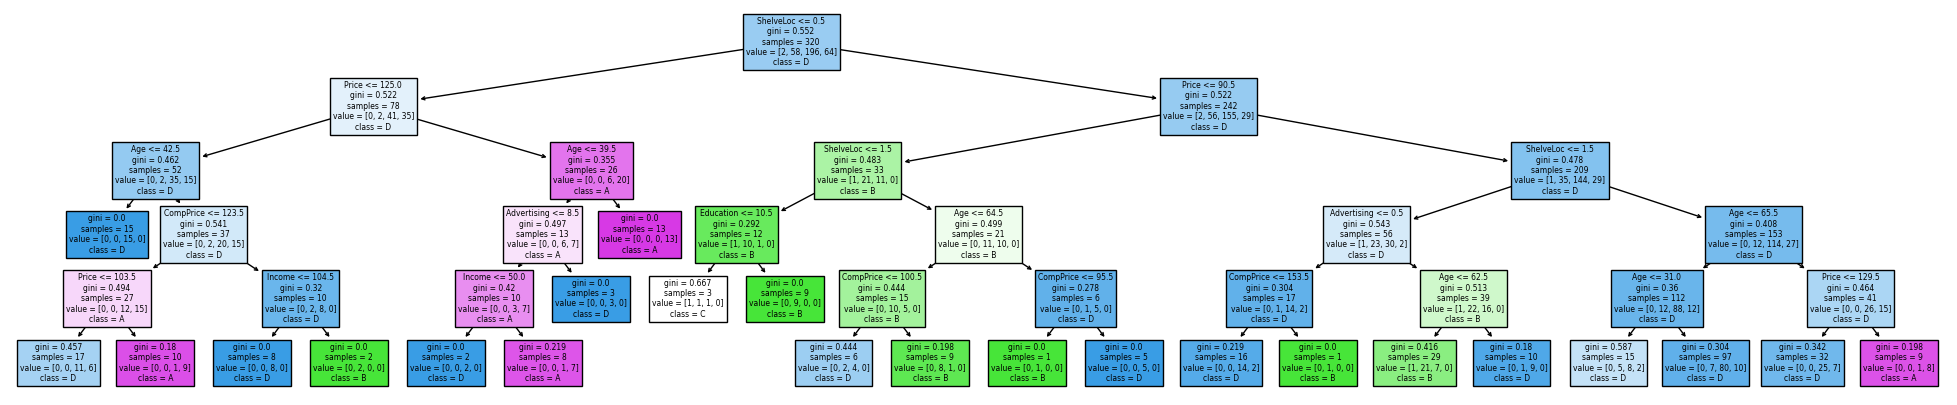

In [60]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['C', 'B', 'D', 'A']

plt.subplots(figsize=(25,5),dpi=100)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [61]:
model.feature_importances_

array([0.09980462, 0.06243296, 0.08263168, 0.        , 0.30873279,
       0.20743331, 0.22238951, 0.01657512, 0.        , 0.        ])

### Problem 2:<br><br>
Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"<br>

Data Description :<br>

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not



In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import metrics

In [63]:
#Importing data

fraud_df=pd.read_csv('Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Exploratory Data Analysis (EDA)

In [64]:
#Checking for null value

fraud_df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [65]:
fraud_df.shape

(600, 6)

In [66]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [67]:
fraud_df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [ ]:
# As we have categorical datatypes we should first encode them to numerical

In [68]:
fraud_df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [69]:
label_encoder=preprocessing.LabelEncoder()
fraud_df['Marital.Status']=label_encoder.fit_transform(fraud_df['Marital.Status'])
label_encoder.inverse_transform([0,1,2])

array(['Divorced', 'Married', 'Single'], dtype=object)

In [70]:
fraud_df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [71]:
label_encoder=preprocessing.LabelEncoder()
fraud_df['Undergrad']=label_encoder.fit_transform(fraud_df['Undergrad'])
label_encoder.inverse_transform([0,1])

array(['NO', 'YES'], dtype=object)

In [72]:
fraud_df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [73]:
label_encoder=preprocessing.LabelEncoder()
fraud_df['Urban']=label_encoder.fit_transform(fraud_df['Urban'])
label_encoder.inverse_transform([0,1])

array(['NO', 'YES'], dtype=object)

## Preprocessing<br>
Make Decision Tree to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"<br>

In [74]:
#Taxable.Income

l=[]
for i in fraud_df['Taxable.Income']:
  if i <= 30000:
    l.append('Risky')
  else:
    l.append('Good')

#l

In [75]:
# column in dataframe
fraud_df['Taxable.Income']=l
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [76]:
#Creating x variable ie.,Independent variable---all columns except 'Taxable income'
#     and y variable ie., Dependent variable---Taxable income


x=fraud_df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=fraud_df['Taxable.Income']
#print(x)
#print(y)

In [77]:
fraud_df['Taxable.Income'].value_counts()

Taxable.Income
Good     476
Risky    124
Name: count, dtype: int64

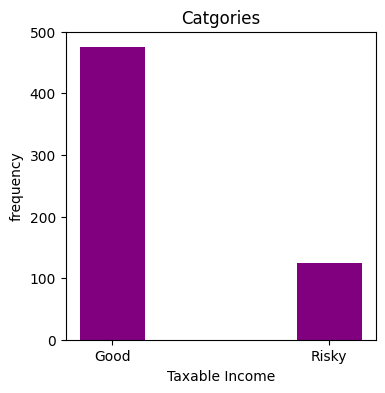

In [78]:
plt.figure(figsize=(4,4))
plt.bar(fraud_df['Taxable.Income'].unique(),fraud_df['Taxable.Income'].value_counts()\
        ,color ='purple',width = 0.3)
plt.ylim(0,500)
plt.xlabel('Taxable Income')
plt.ylabel('frequency')
plt.title('Catgories')
plt.show()

In [79]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(480, 5)
(480,)
(120, 5)
(120, 5)


In [81]:
fraud_df.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
115,1,0,Good,78251,21,1
399,0,2,Good,74497,21,0
182,0,0,Risky,89632,4,1
123,1,1,Risky,79683,26,0
257,1,1,Good,31611,17,1
486,1,2,Good,57230,29,1
586,1,2,Good,106230,30,0
210,1,2,Good,125993,13,1
33,1,2,Good,157251,21,0
272,0,2,Good,126488,1,1


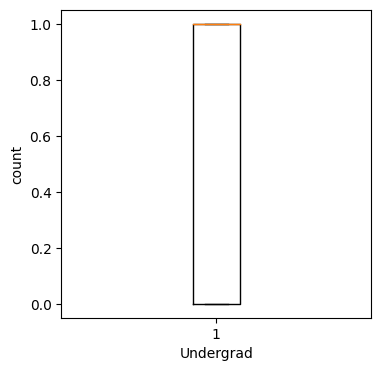

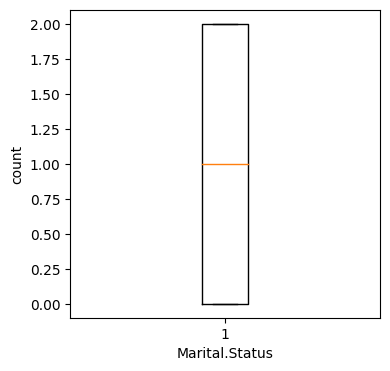

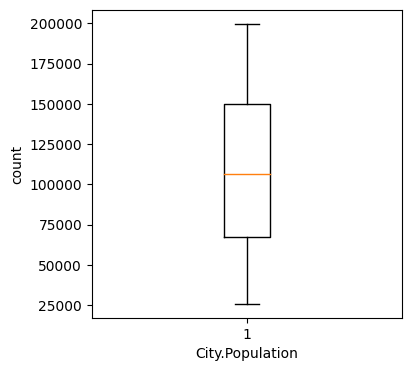

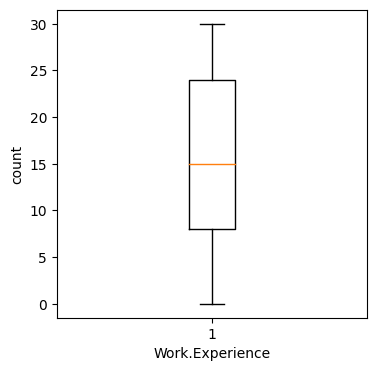

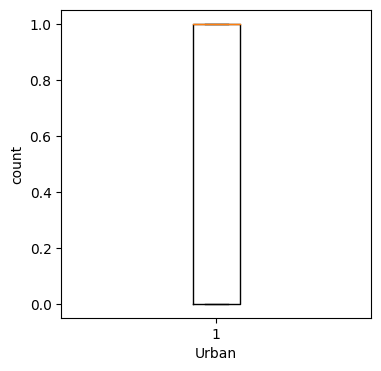

In [82]:
columns = list(fraud_df.columns)

for i in columns:
    if fraud_df[i].dtypes==object:
        pass
    else:
        plt.figure(figsize=(4,4))
        plt.boxplot(fraud_df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [83]:
# There are no outliers in the numeric columns

## Modeling

### Building Decision Tree Classifier using 'gini' Criteria

In [84]:
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [85]:
#gini= 1-p1^2 -p2^2 -p3^2  # 1-(1/n)

In [86]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [87]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [88]:
y.unique()

array(['Good', 'Risky'], dtype=object)

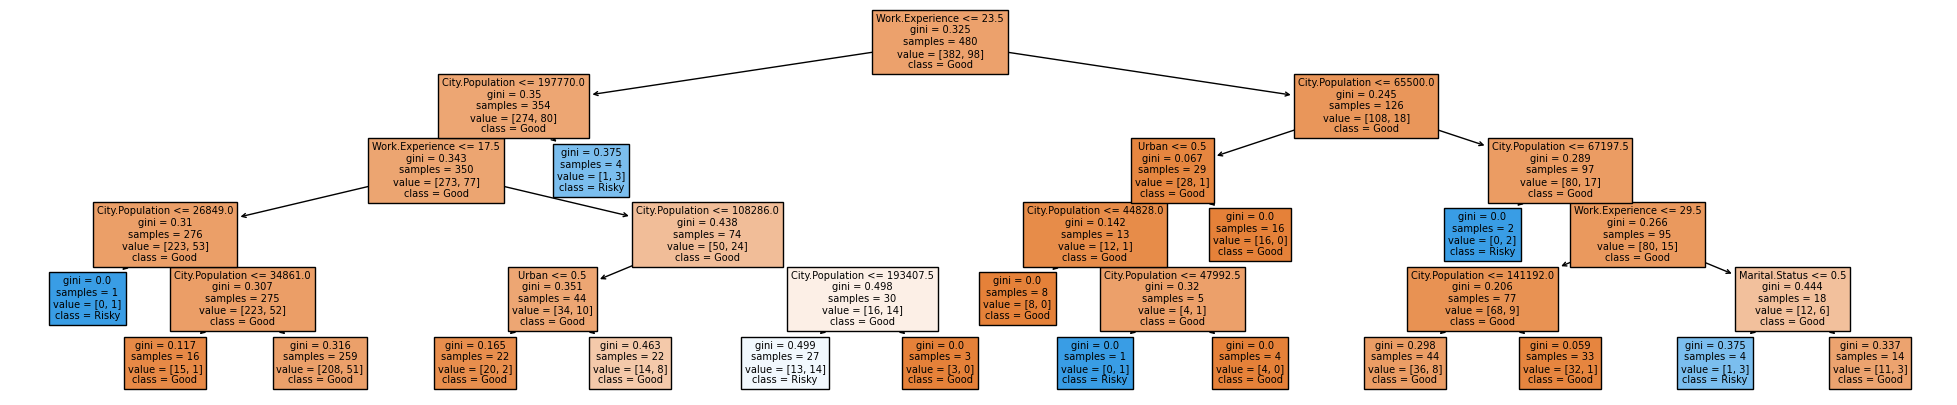

In [89]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['Good', 'Risky']

plt.subplots(figsize=(25,5),dpi=100)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## Evaluation

In [90]:
#Predicting on testing data

preds=model.predict(x_test) #Predicting on test dataset
pd.Series(preds).value_counts() #getting the count of each catagories

Good     107
Risky     13
Name: count, dtype: int64

In [91]:
#Accuracy of training data

model.score(x_train,y_train)

0.8145833333333333

In [92]:
#Classification Report

print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.78      0.88      0.83        94
       Risky       0.15      0.08      0.10        26

    accuracy                           0.71       120
   macro avg       0.46      0.48      0.46       120
weighted avg       0.64      0.71      0.67       120



In [93]:
model.score(x_test,y_test)

0.7083333333333334

Data is imbalanced .Therefore we look for f1_score

In [94]:
accuracy = metrics.accuracy_score(y_test,preds)
precision = metrics.precision_score(y_test, preds,average="weighted")
recall = metrics.recall_score(y_test,preds,average="weighted")
f1_score = metrics.f1_score(y_test,preds,average="weighted")
print("The accuracy is ",accuracy)
print("The precision is ",precision)
print("The Recall is ",recall)
print("The F1 score is ",f1_score)

The accuracy is  0.7083333333333334
The precision is  0.6409657320872274
The Recall is  0.7083333333333334
The F1 score is  0.6691542288557215


Pecision and Recall Imbalance: here we have a minority class ("Risky"), it's often more important to have high precision because we want to minimize false positives. False positives in this context would mean mistakenly flagging non-fraudulent transactions as fraudulent, which can be inconvenient for users. On the other hand, recall (the ability to correctly identify actual fraud cases) may be sacrificed to achieve high precision.
<br>
Dealing with Imbalanced Data: To address imbalanced data,we look for weighted average of precision, recall, and F1-score. This provides a balanced overall evaluation of your model's performance. In your case, the weighted averages are:<br>

Weighted Average Precision: 0.64<br>
Weighted Average Recall: 0.71<br>
Weighted Average F1-Score: 0.67<br>
These weighted average values give you a better overall sense of how well your model is performing, considering the class imbalance.



In [95]:
model.feature_importances_

array([0.        , 0.08062271, 0.62973378, 0.21193154, 0.07771197])

Alternating  the value of hyperparameters min_samples_split,max_depth

In [96]:
model2 = DecisionTreeClassifier(criterion="gini",min_samples_split=4,max_depth=6)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.79      0.95      0.86        94
       Risky       0.29      0.08      0.12        26

    accuracy                           0.76       120
   macro avg       0.54      0.51      0.49       120
weighted avg       0.68      0.76      0.70       120



As its a fraud check data  and imbalanced, i am focusing on increase the Recall of weightes average,now it is 76%

In [97]:
model3 = DecisionTreeClassifier(criterion="gini",min_samples_split=4,max_depth=7)
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.79      0.94      0.85        94
       Risky       0.25      0.08      0.12        26

    accuracy                           0.75       120
   macro avg       0.52      0.51      0.49       120
weighted avg       0.67      0.75      0.69       120



### Building Decision Tree Classifier using 'entropy' Criteria

In [98]:
#entropy: -p1log2(p1) -p2log2(p2) -p3log2(p3)  # log2(n)

In [99]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=5)

In [100]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [101]:
#Prediction
preds=model.predict(x_test)

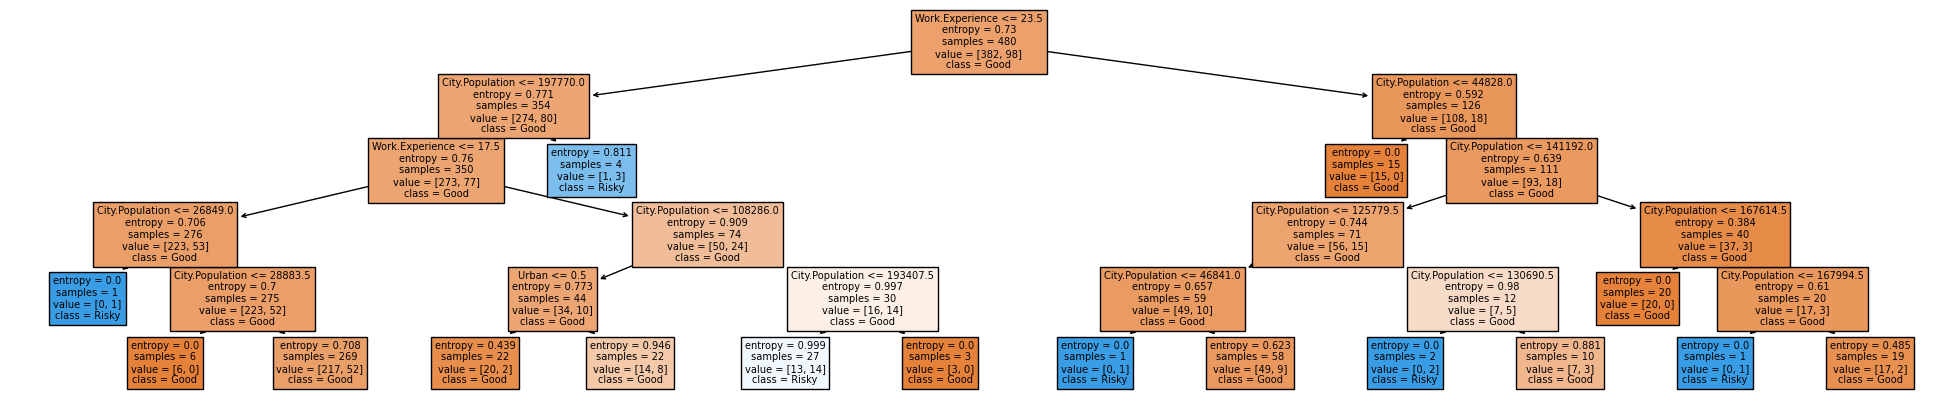

In [102]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['Good', 'Risky']

plt.subplots(figsize=(25,5),dpi=100)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## Evaluation

In [103]:
#Accuracy of training data

model.score(x_train,y_train)

0.8125

In [104]:
#Classification Report

print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.78      0.88      0.83        94
       Risky       0.21      0.12      0.15        26

    accuracy                           0.72       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.66      0.72      0.68       120



In [105]:
accuracy = metrics.accuracy_score(y_test,preds)
precision = metrics.precision_score(y_test, preds,average="weighted")
recall = metrics.recall_score(y_test,preds,average="weighted")
f1_score = metrics.f1_score(y_test,preds,average="weighted")
print("The accuracy is ",accuracy)
print("The precision is ",precision)
print("The Recall is ",recall)
print("The F1 score is ",f1_score)

The accuracy is  0.7166666666666667
The precision is  0.6597933513027853
The Recall is  0.7166666666666667
The F1 score is  0.6826666666666668
